<a href="https://colab.research.google.com/github/CeeCeeOkeke/PortfolioProject/blob/main/Health_Insurance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from xgboost import XGBRegressor


In [ ]:
insurance_df = pd.read_csv('/content/insurance.csv')

In [11]:
insurance_df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
#checking the shape of the dataset
insurance_df.shape

(1338, 7)

In [ ]:
#checking the statistical measures
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# checking for null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Visualisation

<Axes: xlabel='age', ylabel='count'>

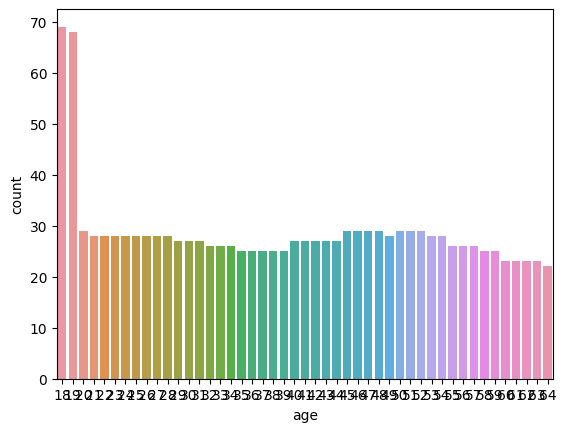

In [ ]:
#visualizing the age
sns.countplot(x='age', data=insurance_df)

<Axes: xlabel='age', ylabel='count'>

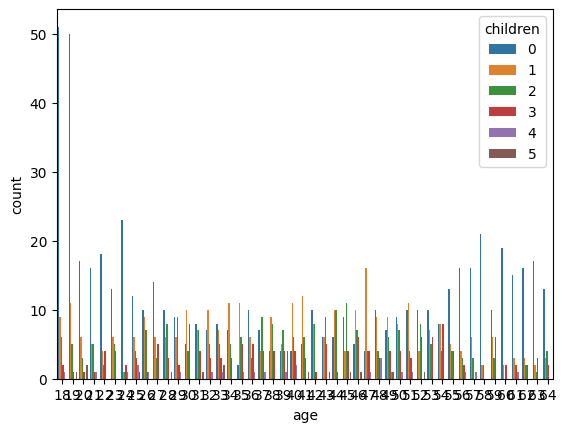

In [ ]:
sns.countplot(x='age', hue='children', data=insurance_df)

In [18]:
# convert categorical columns to numerical values
insurance_df.replace({'sex':{'male':0,'female':1},'smoker':{'no':0, 'yes':1}, 'region':{'northwest': 0, 'southeast':1}}, inplace=True )

In [19]:
#checking if the categorical columns has been converted to numerical values
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [20]:
#separating the data and charges
X = insurance_df.drop(columns='charges', axis=1)
Y = insurance_df['charges']

In [21]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       1
2      28    0  33.000         3       0       1
3      33    0  22.705         0       0       0
4      32    0  28.880         0       0       0
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       0
1334   18    1  31.920         0       0       0
1335   18    1  36.850         0       0       1
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       0

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Training and Testing

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (936, 6) (402, 6)


Training the Model

In [61]:
model = XGBRegressor()


In [88]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Model Evaluation

In [89]:
#prediction on training data
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

In [90]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9962616699554161
Mean Absolute Error :  425.3588609838409


In [94]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [73]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8158346646846748
Mean Absolute Error :  3176.346428853195


In [78]:
input_data = (32,0,28.880,0,0,0)

#input_data as a numpy array
input_data_as_array = np.asarray(input_data)

#reshaping the array
input_data_reshaped = input_data_as_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print(prediction)


[3221.061]
